### reading  the dataset


In [3]:
import pandas as pd 
import os
df=pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


## lets see data info
- to see if there is null values in the data
- to see the data type of each column 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

## check for duplicates


In [5]:
df.duplicated().sum()

np.int64(0)

### good we have no nulls , the data type of each column is numerical except the label column as it should be and there is no duplicates <br> <br> so lets go to the next step


## now lets visualize some of our dataset samples


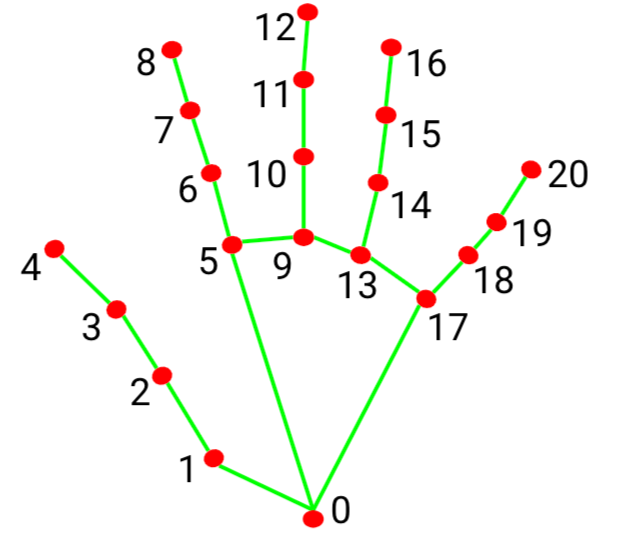

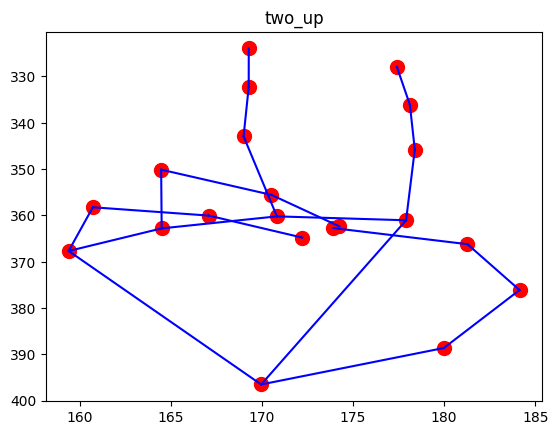

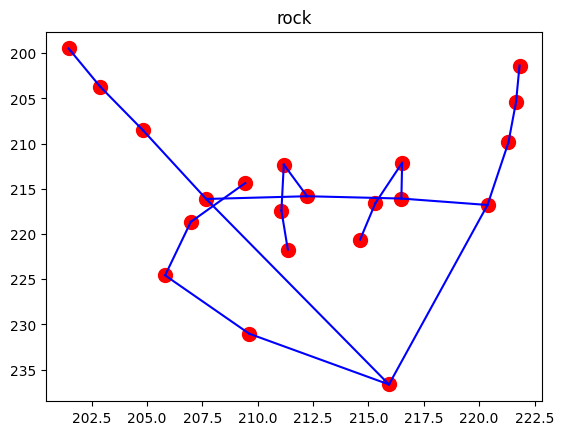

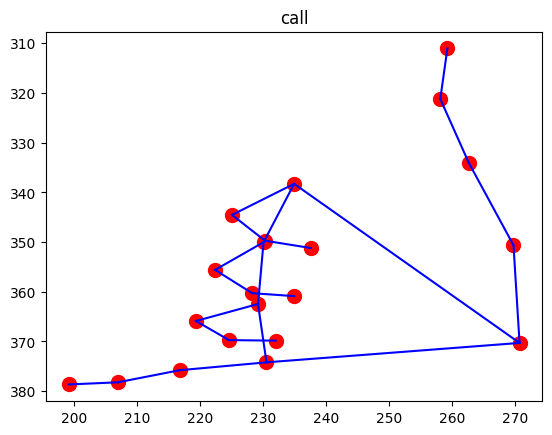

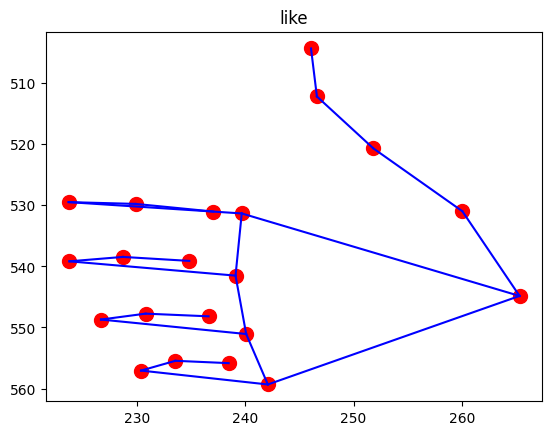

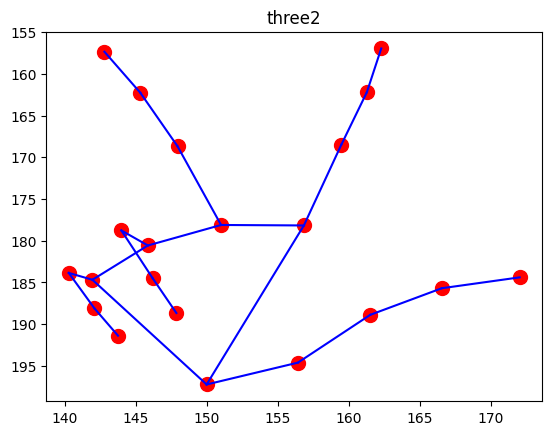

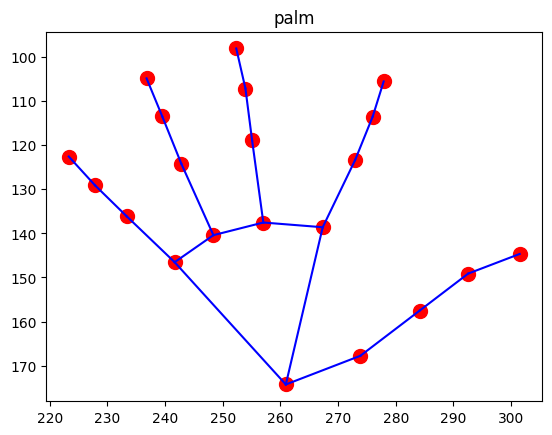

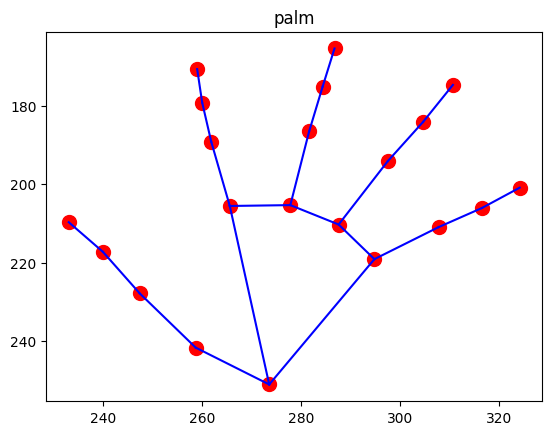

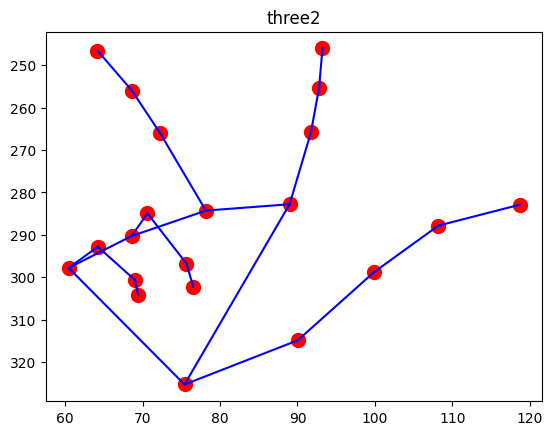

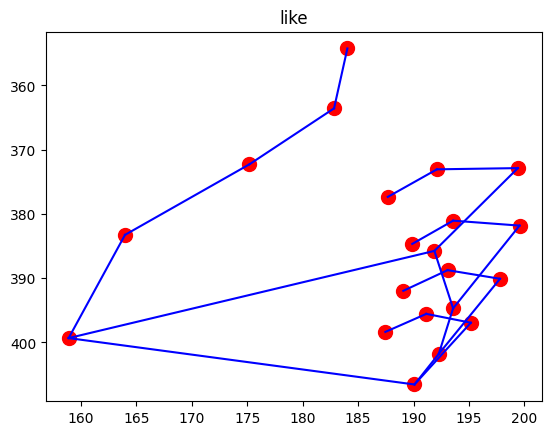

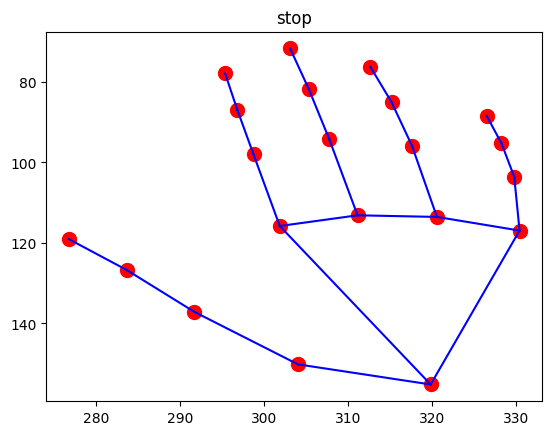

In [6]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)  # For reproducibility
def visualize_hand_landmarks(sample):
    
    ## first we need to scatter hand landmarks points
    x=sample[0::3][0:-1]
    y=sample[1::3]
    plt.scatter(x,y,color='red',s=100)
    ## then we need to connect the points with lines to visualize the hand skeleton we can use the image coordinates of the landmarks to connect them in the correct order
    lines=[
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(5,9),(6,7),(7,8),
        (9,10),(9,13),(10,11),(11,12),
        (13,14),(13,17),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)]
    for line in lines:
        plt.plot([x.iloc[line[0]], x.iloc[line[1]]], [y.iloc[line[0]], y.iloc[line[1]]], color='blue')
    plt.title(sample.iloc[-1])
    ## invert y-axis as media pipe uses a coordinate system where the origin is at the top-left corner of the image, and the y-axis increases downwards.
    plt.gca().invert_yaxis()

    plt.show()
rndIndex=np.random.randint(0,len(df),10)
for i in rndIndex:
    visualize_hand_landmarks(df.iloc[i])    



### Now let's normalize our dataset so hand size or hand position from the camera doesn't affect our prediction
- we will do it by first making point 0 (wrist) as the origin of the hand (handles hand position)
- Then we will divide by the distance from point 0 to point 12 (middle fingertip) to normalize scale (handles hand size variations)

In [ ]:
X = df.drop('label', axis=1).copy()
y = df['label']

x_cols = list(range(0, X.shape[1], 3))
y_cols = [c + 1 for c in x_cols]
z_cols = [c + 2 for c in x_cols]

#subract by the wrist coordinates
X.iloc[:, x_cols] = X.iloc[:, x_cols].sub(X.iloc[:, 0], axis=0)
X.iloc[:, y_cols] = X.iloc[:, y_cols].sub(X.iloc[:, 1], axis=0)
X.iloc[:, z_cols] = X.iloc[:, z_cols].sub(X.iloc[:, 2], axis=0)

#normalize the coordinates by the distance between the wrist and the middle finger
div=np.sqrt(X['x13']**2+X['y13']**2+X['z13']**2)
X.iloc[:, x_cols] = X.iloc[:, x_cols].div(div, axis=0)
X.iloc[:, y_cols] = X.iloc[:, y_cols].div(div, axis=0)
X.iloc[:, z_cols] = X.iloc[:, z_cols].div(div, axis=0)

### now lets split our dataset to train and test before preprocessing our data to prevent data leakage <br>
#### but first lets see number of instances of each class

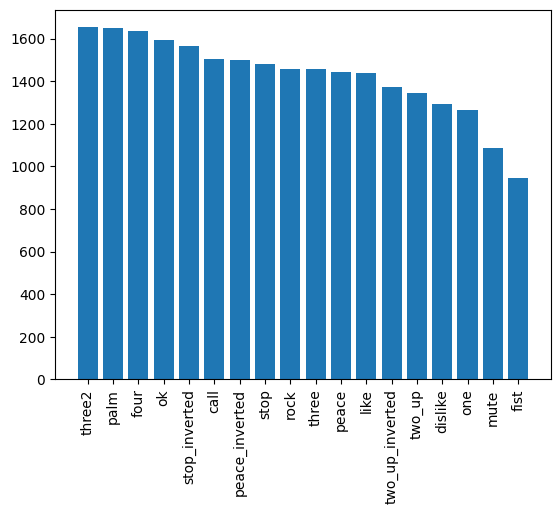

In [8]:
plt.bar(y.value_counts().index, y.value_counts().values)
plt.xticks(rotation=90)
plt.show()

### Now since our data doesn't contain the same number of samples in each class, we will use stratify in train test split


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### encoding our labels using label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

## Now lets try some model with grid search to find the best hyperparameters

### intialize some function to make the code more clean

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define a function to train the model using GridSearchCV and StratifiedKFold
def train_model(model,param_grid,X_train,y_train):
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=skf, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Define a function to evaluate the model on the test set
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=le.classes_,digits=3))
    cf=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')


### lets begin with knn

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
                 precision    recall  f1-score   support

           call      0.993     0.990     0.992       301
        dislike      1.000     0.996     0.998       259
           fist      0.995     0.989     0.992       189
           four      0.988     0.985     0.986       327
           like      0.993     0.997     0.995       287
           mute      0.950     0.972     0.961       217
             ok      0.994     0.991     0.992       318
            one      0.960     0.953     0.956       253
           palm      0.991     0.994     0.992       330
          peace      0.978     0.944     0.961       288
 peace_inverted      0.964     0.980     0.972       299
           rock      0.997     0.993     0.995       292
           stop      0.920     0.966     0.942       296
  stop_inverted      0.968     0.952     0.960       314
 

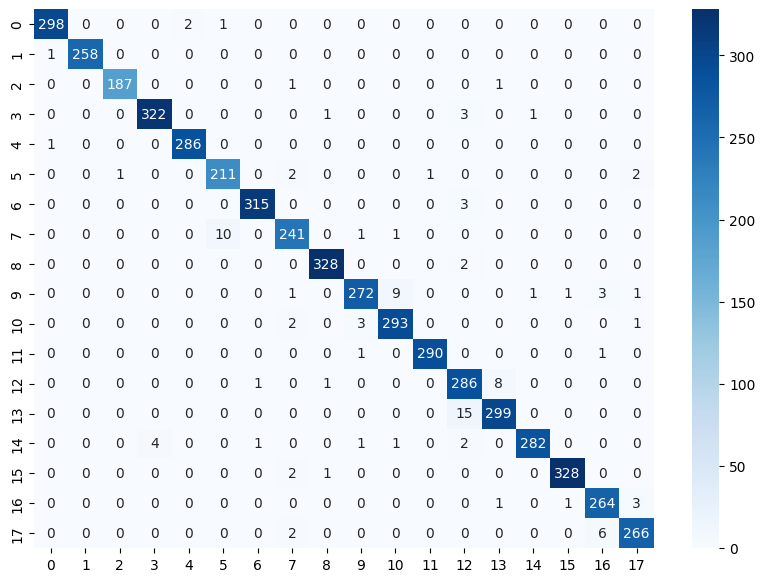

In [13]:
knn_parameters = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_winner = train_model(knn, knn_parameters, X_train, y_train)
evaluate_model(knn_winner, X_test, y_test)


### logestic regression

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'C': 100, 'max_iter': 10000}
                 precision    recall  f1-score   support

           call      0.920     0.917     0.918       301
        dislike      0.996     0.996     0.996       259
           fist      1.000     0.989     0.995       189
           four      0.896     0.865     0.880       327
           like      0.920     0.916     0.918       287
           mute      0.972     0.949     0.960       217
             ok      0.994     0.991     0.992       318
            one      0.954     0.976     0.965       253
           palm      0.847     0.858     0.852       330
          peace      0.726     0.708     0.717       288
 peace_inverted      0.896     0.839     0.867       299
           rock      0.997     0.997     0.997       292
           stop      0.891     0.936     0.913       296
  stop_inverted      0.978     0.984     0.981       314
          three      0.986     0.969 

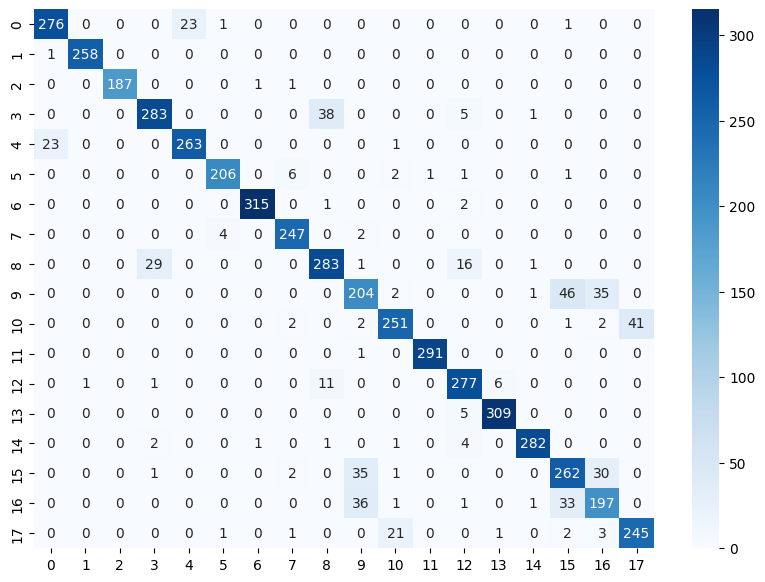

In [14]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   

    'max_iter': [10000]
}
log_reg=LogisticRegression(random_state=42)
log_reg_winner = train_model(log_reg, param_grid, X_train, y_train)
evaluate_model(log_reg_winner, X_test, y_test)



## svm
### we intialized it with probability=True because we may use it in voting classifier with soft voting

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
                 precision    recall  f1-score   support

           call      0.993     0.990     0.992       301
        dislike      0.996     1.000     0.998       259
           fist      1.000     1.000     1.000       189
           four      0.994     0.991     0.992       327
           like      0.993     0.993     0.993       287
           mute      0.963     0.968     0.966       217
             ok      0.994     0.991     0.992       318
            one      0.965     0.968     0.966       253
           palm      0.985     0.997     0.991       330
          peace      0.990     0.993     0.991       288
 peace_inverted      0.997     0.993     0.995       299
           rock      0.986     0.993     0.990       292
           stop      0.977     0.986     0.982       296
  stop_inverted      0.994     0.994     0.994       314
          three      0.9

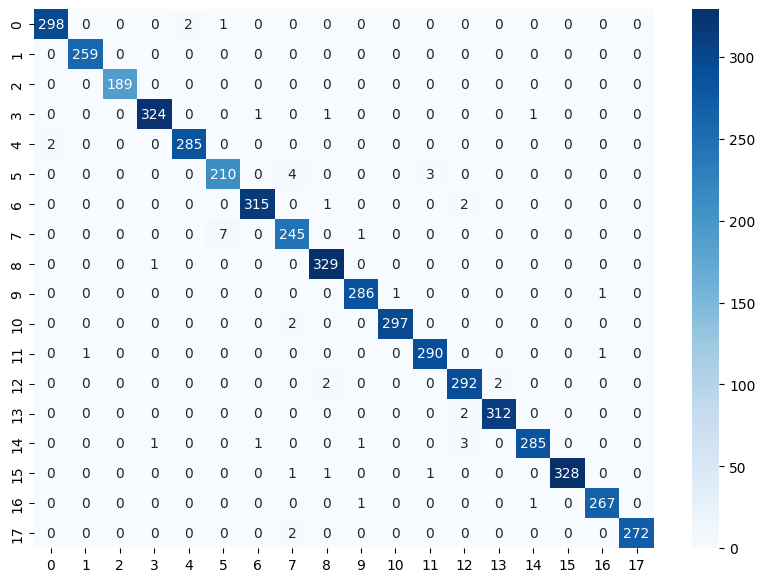

In [10]:
from sklearn.svm import SVC
svm_parameters = {'kernel': ['rbf'],
                  'C': [1, 10 , 100, 150],
                  'gamma': [0.01,0.05, 0.1, 0.5]
                }
svm = SVC(random_state=42,probability=True)
svm_winner = train_model(svm, svm_parameters, X_train, y_train)
evaluate_model(svm_winner, X_test, y_test)

## Now lets try tree models

### first normal decision tree

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
                 precision    recall  f1-score   support

           call      0.987     0.983     0.985       301
        dislike      0.992     0.996     0.994       259
           fist      0.979     0.989     0.984       189
           four      0.945     0.951     0.948       327
           like      0.986     0.990     0.988       287
           mute      0.900     0.949     0.924       217
             ok      0.997     0.984     0.991       318
            one      0.933     0.933     0.933       253
           palm      0.952     0.952     0.952       330
          peace      0.954     0.941     0.948       288
 peace_inverted      0.956     0.943     0.949       299
           rock      0.993     0.979     0.986       292
           stop      0.898     0.919     0.908       296
  stop_inverted      0.962    

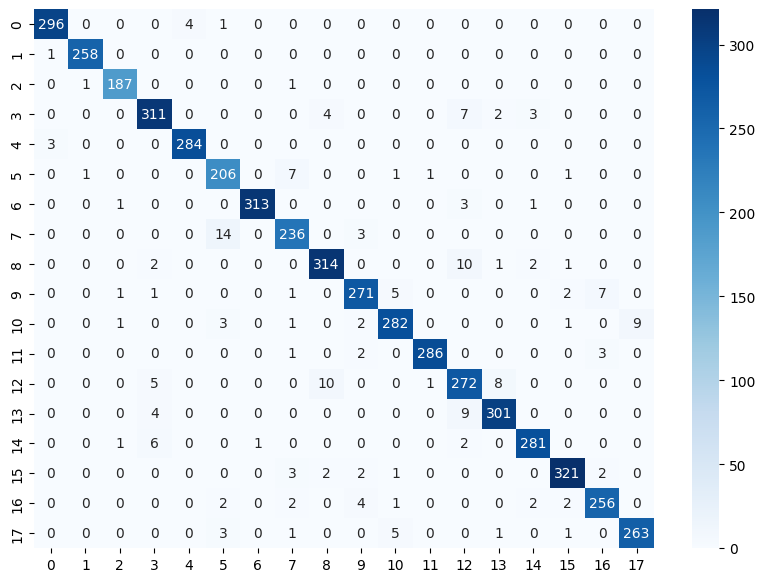

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
dt_winner = train_model(dt, dt_parameters, X_train, y_train)
evaluate_model(dt_winner, X_test, y_test)


## xgboost 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 400}
                 precision    recall  f1-score   support

           call      0.997     0.987     0.992       301
        dislike      1.000     0.996     0.998       259
           fist      0.995     0.989     0.992       189
           four      0.982     0.991     0.986       327
           like      0.990     0.997     0.993       287
           mute      0.977     0.968     0.972       217
             ok      0.991     0.994     0.992       318
            one      0.958     0.980     0.969       253
           palm      0.988     0.982     0.985       330
          peace      0.986     0.972     0.979       288
 peace_inverted      0.990     0.977     0.983       299
           rock      0.997     0.993     0.995       292
           stop      0.957     0.983     0.970       296
  stop_inverted      0.987     0.984     0.986       314
      

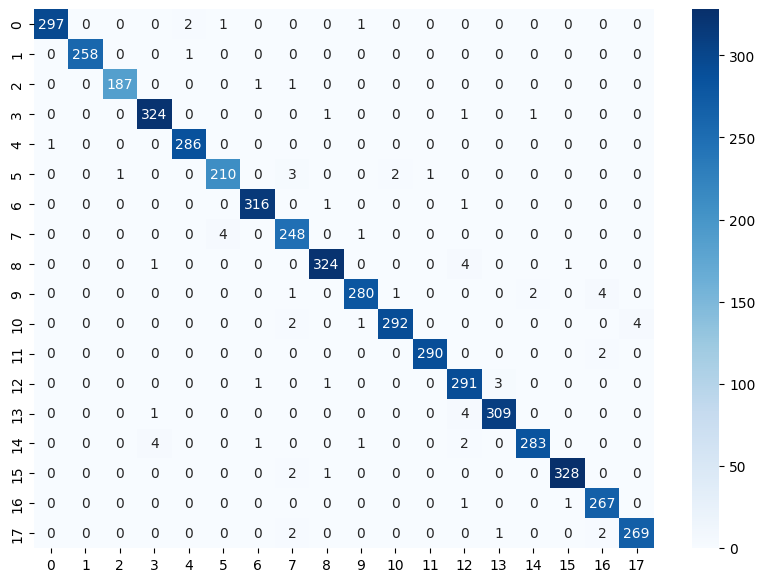

In [18]:
import xgboost
xgb_parameters = {
    'n_estimators': [ 300,400],
    'learning_rate': [ 0.1,0.2,0.3],
    'max_depth': [3, 4],
}
xgb=xgboost.XGBClassifier(random_state=42,n_jobs=-1)
xgb_winner = train_model(xgb, xgb_parameters, X_train, y_train)
evaluate_model(xgb_winner, X_test, y_test)

### random forest

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': None, 'n_estimators': 300}
                 precision    recall  f1-score   support

           call      0.987     0.987     0.987       301
        dislike      1.000     0.996     0.998       259
           fist      0.995     0.995     0.995       189
           four      0.979     0.988     0.983       327
           like      0.993     0.990     0.991       287
           mute      0.963     0.963     0.963       217
             ok      0.994     0.987     0.991       318
            one      0.946     0.972     0.959       253
           palm      0.982     0.976     0.979       330
          peace      0.975     0.955     0.965       288
 peace_inverted      0.973     0.970     0.972       299
           rock      0.997     0.983     0.990       292
           stop      0.932     0.976     0.954       296
  stop_inverted      0.987     0.978     0.982       314
          three      0.993

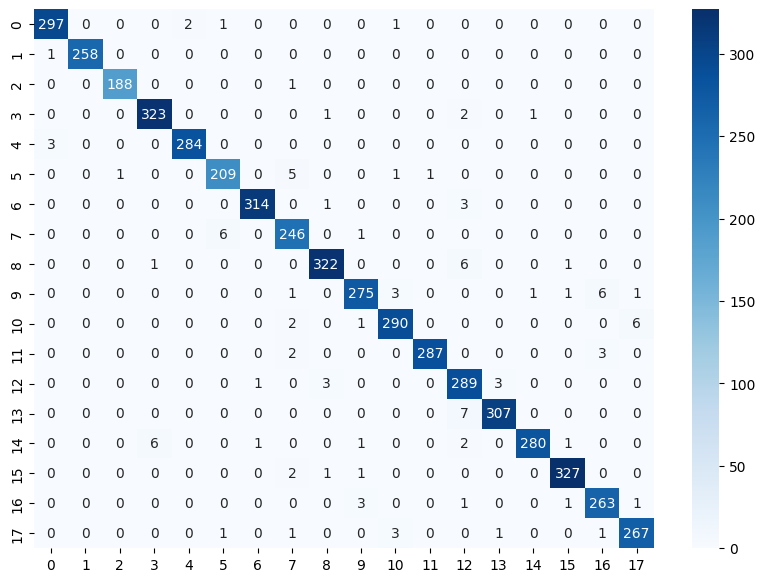

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,10, 20],

}   
rf = RandomForestClassifier(random_state=42)
rf_winner = train_model(rf, rf_parameters, X_train, y_train)    
evaluate_model(rf_winner, X_test, y_test)

### now lets try ensemble calssifier combining the most powerful models we got which are (svm,xgboost,randomForest,knn)


### first we will try voting classifier 

                 precision    recall  f1-score   support

           call      0.993     0.990     0.992       301
        dislike      1.000     0.996     0.998       259
           fist      0.995     0.995     0.995       189
           four      0.982     0.988     0.985       327
           like      0.993     0.997     0.995       287
           mute      0.977     0.968     0.972       217
             ok      0.994     0.991     0.992       318
            one      0.958     0.980     0.969       253
           palm      0.988     0.988     0.988       330
          peace      0.993     0.979     0.986       288
 peace_inverted      0.990     0.990     0.990       299
           rock      0.997     0.993     0.995       292
           stop      0.961     0.986     0.973       296
  stop_inverted      0.990     0.994     0.992       314
          three      0.993     0.969     0.981       291
         three2      0.994     0.991     0.992       331
         two_up      0.982    

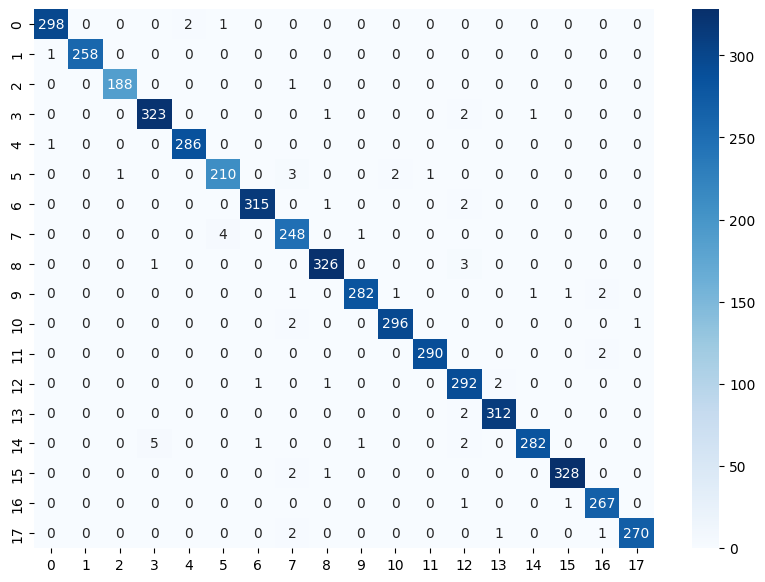

In [20]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_winner),
    ('xgb', xgb_winner),
    ('rf', rf_winner),
    ('knn', knn_winner)
    ], voting='soft')

voting_clf.fit(X_train, y_train)
evaluate_model(voting_clf, X_test, y_test)

## stacking classifier

                 precision    recall  f1-score   support

           call      0.993     0.990     0.992       301
        dislike      1.000     0.996     0.998       259
           fist      0.995     0.995     0.995       189
           four      0.988     0.991     0.989       327
           like      0.993     0.997     0.995       287
           mute      0.972     0.968     0.970       217
             ok      0.991     0.991     0.991       318
            one      0.961     0.976     0.969       253
           palm      0.988     0.994     0.991       330
          peace      0.993     0.993     0.993       288
 peace_inverted      0.990     0.990     0.990       299
           rock      0.997     0.997     0.997       292
           stop      0.980     0.980     0.980       296
  stop_inverted      0.987     0.997     0.992       314
          three      0.993     0.976     0.984       291
         three2      0.997     0.991     0.994       331
         two_up      0.993    

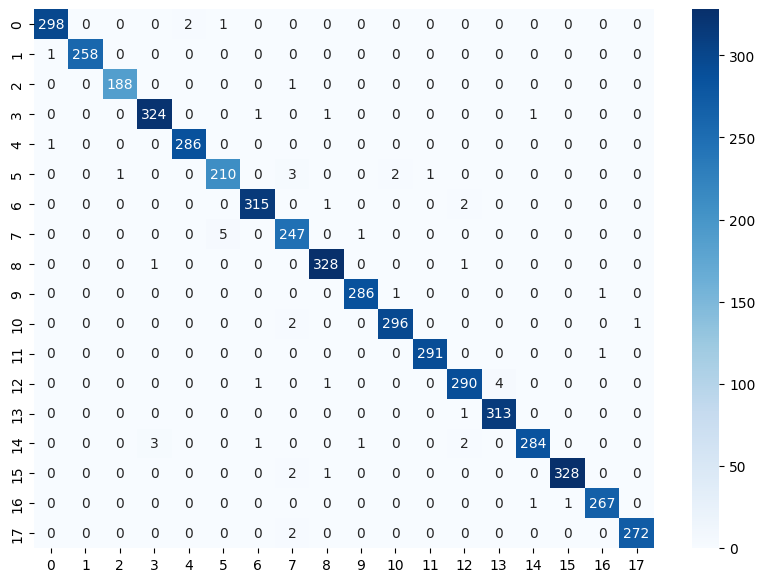

In [21]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('svm', svm_winner),
    ('xgb', xgb_winner),
    ('rf', rf_winner),
    ('knn', knn_winner)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=10000,random_state=42))
stacking_clf.fit(X_train, y_train)
evaluate_model(stacking_clf, X_test, y_test)

              Model  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)
                SVM  0.989873              0.989911           0.989873             0.989882
Stacking Classifier  0.989484              0.989515           0.989484             0.989489
  Voting Classifier  0.987537              0.987638           0.987537             0.987554
            XGBoost  0.985200              0.985313           0.985200             0.985218
                KNN  0.978773              0.979019           0.978773             0.978818
      Random Forest  0.978773              0.979010           0.978773             0.978824
      Decision Tree  0.961636              0.961914           0.961636             0.961725
Logistic Regression  0.902824              0.903213           0.902824             0.902842


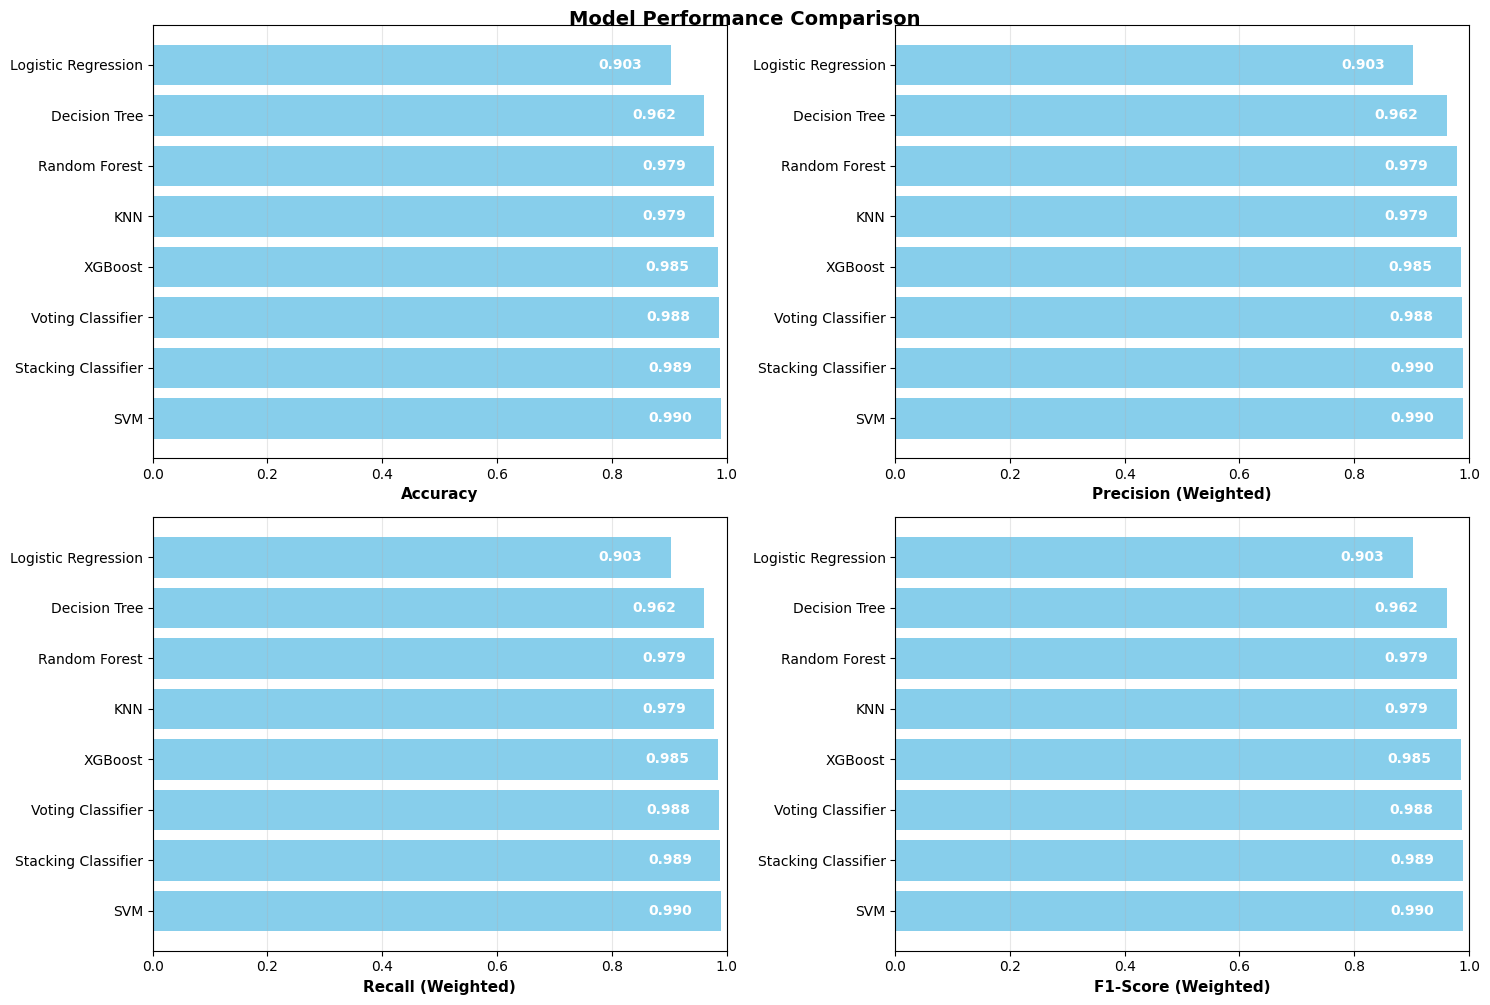

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a list of all models to compare
models = {
    'KNN': knn_winner,
    'Logistic Regression': log_reg_winner,
    'SVM': svm_winner,
    'Decision Tree': dt_winner,
    'XGBoost': xgb_winner,
    'Random Forest': rf_winner,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}

# Calculate metrics for each model
results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Weighted)': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall (Weighted)': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score (Weighted)': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

comparison_df = pd.DataFrame(results)

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)


print(comparison_df.to_string(index=False))
print("="*80)

# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(comparison_df['Model'], comparison_df[metric], color='skyblue')
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_xlim([0, 1])
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width - 0.05, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='right', va='center', fontweight='bold', color='white')
    
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold', y=1.00)
plt.show()



### from the above comparison between model we can tell that the best model we got is svm 

### Now lets save winner model weights

In [15]:
import joblib
joblib.dump(svm_winner, 'model\hand_gesture_svm_model.pkl')


['model\\hand_gesture_svm_model.pkl']

### now we will use the winner model to predict hand gestures in real time using media pipe to get hand landmarks

In [ ]:
import cv2
import mediapipe as mp
from collections import deque, Counter
import pandas as pd  # added to convert landmarks to DataFrame
import joblib
import numpy as np


mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)
## load model
svm_winner = joblib.load('model\hand_gesture_svm_model.pkl')

window_size = 15

prediction_buffer = deque(maxlen=window_size)


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

# function to normalize landmarks
def normalize_landmarks(hand_landmarks):

    coords = np.array([[lm.x, lm.y, lm.z]
                       for lm in hand_landmarks.landmark])

    wrist = coords[0]
    coords = coords - wrist

    ref_point = coords[12] 
    scale = np.linalg.norm(ref_point)

    if scale > 0:
        coords = coords / scale

    return coords.flatten() 


while True:
    success, frame = cap.read()
    if not success:
        break

    frame = cv2.flip(frame, 1)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(rgb)

    display_text = "No hand"

    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]

        # Draw hand
        mp_draw.draw_landmarks(
            frame,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )

        # ---- Normalize landmarks ----
        landmarks = normalize_landmarks(hand_landmarks)

        # ---- Predict ----
        proba = svm_winner.predict_proba([landmarks])[0]
        best_index = np.argmax(proba)

        predicted_class = svm_winner.classes_[best_index]
        confidence = proba[best_index]

        prediction_buffer.append(predicted_class)

        # smoothing using mode of window size
        if len(prediction_buffer) > 0:
            stable_class = Counter(prediction_buffer).most_common(1)[0][0]
            gesture_name = le.inverse_transform([stable_class])[0]
            display_text = f"{gesture_name} "

    # ---- Display result ----
    cv2.putText(frame,
                display_text,
                (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2)

    cv2.imshow("Hand Gesture Recognition", frame)

    # ESC to exit
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()